In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#list of useful imports that  I will use
%matplotlib inline
import os

import numpy as np

import seaborn as sns
import random

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize




In [13]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [15]:
# Twitter Api Credentials
consumerKey = '1loLJsbQog2a3fIjBzgPLFtGz'
consumerSecret = 'lUmzH57QsUIsYqTes2TCJxP6ajKqdvhWg88TUBu1uNx0A9Nqfq'
accessToken = '1295662264440119296-wWjuXQ21YwnhnWCntJKLRHyUjrDmBb'
accessTokenSecret = 'UwYTmdajrBoqYc6O8FV6FYFscNqEuYXaYIJugIE03BVuS'

In [16]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [81]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="IPL", count = 2000, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) #VIVOIPL 2021 Anthem salutes the new, bold and confident spirit of India. Let’s all believe in #IndiaKaApnaMantra.

Tell us what you think will be your team's Success Mantra this season.

#VIVOIPL 2021 - Starts from April 9th !

@Vivo_India @StarSportsIndia @DisneyPlusHS https://t.co/Um7UsCDCkY

2) NEWS: BCCI announces Upstox as Official Partner for IPL

#VIVOIPL @Vivo_India @upstox 

More details 👉 https://t.co/dGuoUxz8xZ https://t.co/BkAKDymL2Y

3) The new Indian spirit that innovates, redefines &amp; achieves greatness is what #VIVOIPL is about!

Whose mantra will bring success this time?

Join us in celebrating #IndiaKaApnaMantra 

LIVE from Apr 9

@Vivo_India, @StarSportsIndia &amp; @DisneyPlusHS https://t.co/Ii01eRXoX1

4) #VIVOIPL salutes the new Indian spirit that is eager to innovate and rewrite the rulebook.

Will history be created yet again this IPL?

Join us in celebrating #IndiaKaApnaMantra 

LIVE from Apr 9

@Vivo_India, @StarSportsIndia &am

In [82]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,"#VIVOIPL 2021 Anthem salutes the new, bold and..."
1,NEWS: BCCI announces Upstox as Official Partne...
2,"The new Indian spirit that innovates, redefine..."
3,#VIVOIPL salutes the new Indian spirit that is...
4,NEWS: Finn Allen signs up with @RCBTweets as r...


In [83]:
df.shape

(200, 1)

In [84]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,"#VIVOIPL 2021 Anthem salutes the new, bold and..."
1,NEWS: BCCI announces Upstox as Official Partne...
2,"The new Indian spirit that innovates, redefine..."
3,#VIVOIPL salutes the new Indian spirit that is...
4,NEWS: Finn Allen signs up with @RCBTweets as r...


In [85]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,"VIVOIPL 2021 Anthem salutes the new, bold and ..."
1,NEWS: BCCI announces Upstox as Official Partne...
2,"The new Indian spirit that innovates, redefine..."
3,VIVOIPL salutes the new Indian spirit that is ...
4,NEWS: Finn Allen signs up with as replacement...
...,...
195,"Final. 8.3: P Dubey to R Sharma, 6 runs, 74/1 ..."
196,At the end of the powerplay MumbaiIndians are ...
197,"Final. 4.3: M Stoinis to S Yadav, 6 runs, 55/1..."
198,"Final. 4.2: M Stoinis to S Yadav, 4 runs, 49/1..."


In [86]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,"VIVOIPL 2021 Anthem salutes the new, bold and ...",0.488636,0.336174
1,NEWS: BCCI announces Upstox as Official Partne...,0.500000,0.500000
2,"The new Indian spirit that innovates, redefine...",0.318182,0.202273
3,VIVOIPL salutes the new Indian spirit that is ...,0.477273,0.136364
4,NEWS: Finn Allen signs up with as replacement...,0.500000,0.500000
...,...,...,...
195,"Final. 8.3: P Dubey to R Sharma, 6 runs, 74/1 ...",1.000000,0.375000
196,At the end of the powerplay MumbaiIndians are ...,0.750000,0.068182
197,"Final. 4.3: M Stoinis to S Yadav, 6 runs, 55/1...",1.000000,0.000000
198,"Final. 4.2: M Stoinis to S Yadav, 4 runs, 49/1...",1.000000,0.000000


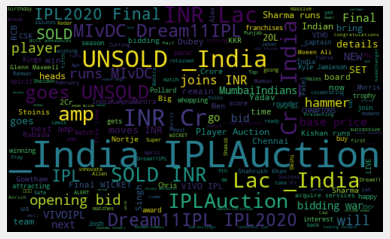

In [87]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [90]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score <= 0:
    return 'Negative'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,"VIVOIPL 2021 Anthem salutes the new, bold and ...",0.488636,0.336174,Positive
1,NEWS: BCCI announces Upstox as Official Partne...,0.500000,0.500000,Positive
2,"The new Indian spirit that innovates, redefine...",0.318182,0.202273,Positive
3,VIVOIPL salutes the new Indian spirit that is ...,0.477273,0.136364,Positive
4,NEWS: Finn Allen signs up with as replacement...,0.500000,0.500000,Positive
...,...,...,...,...
195,"Final. 8.3: P Dubey to R Sharma, 6 runs, 74/1 ...",1.000000,0.375000,Positive
196,At the end of the powerplay MumbaiIndians are ...,0.750000,0.068182,Positive
197,"Final. 4.3: M Stoinis to S Yadav, 6 runs, 55/1...",1.000000,0.000000,Negative
198,"Final. 4.2: M Stoinis to S Yadav, 4 runs, 49/1...",1.000000,0.000000,Negative


In [91]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1) VIVOIPL 2021 Anthem salutes the new, bold and confident spirit of India. Let’s all believe in IndiaKaApnaMantra.

Tell us what you think will be your team's Success Mantra this season.

VIVOIPL 2021 - Starts from April 9th !

_India   

2) NEWS: BCCI announces Upstox as Official Partner for IPL

VIVOIPL _India  

More details 👉  

3) The new Indian spirit that innovates, redefines &amp; achieves greatness is what VIVOIPL is about!

Whose mantra will bring success this time?

Join us in celebrating IndiaKaApnaMantra 

LIVE from Apr 9

_India,  &amp;  

4) VIVOIPL salutes the new Indian spirit that is eager to innovate and rewrite the rulebook.

Will history be created yet again this IPL?

Join us in celebrating IndiaKaApnaMantra 

LIVE from Apr 9

_India,  &amp;  

5) NEWS: Finn Allen signs up with  as replacement for Josh Philippe. _India VIVOIPL 

More details 👉  

6) VIVOIPL is back in India 🇮🇳 🙌

Time to circle your favorite matches on the calendar 🗓️



In [92]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) Check out how , ,  &amp;  stack up after the _India IPLAuction 2⃣0⃣2⃣1⃣ 👍 👇 

2) Here's how the , ,   &amp;  squads look after the _India IPLAuction 2⃣0⃣2⃣1⃣ 👇 

3) How's that for numbers 💥💥

Here are the 🔝5️⃣ buys in the _India IPLAuction 

4) Arjun Tendulkar joins  for INR 20 Lac. 

_India IPLAuction

5) Akash Singh sold to  for INR 20 Lac.

_India IPLAuction

6) Pawan Negi sold to  for INR 50 Lac.

_India IPLAuction

7) Venkatesh Iyer sold to  for INR 20 Lac.

_India IPLAuction

8) Hanuma Vihari goes UNSOLD _India IPLAuction

9) Ben Cutting moves to  for INR 75 Lac. 

_India IPLAuction

10) Karun Nair joins  for INR 50 Lac. 

_India IPLAuction

11) Mujeeb Ur Rahman is SOLD to   for INR 1.50 Cr.

_India IPLAuction

12) C Hari Nishanth joins  for INR 20 Lac. 

_India IPLAuction

13) ._singh moves to  for INR 2 Cr. 

_India IPLAuction

14) Sam Billings joins  for INR 2 Cr. 

_India IPLAuction

15) . joins  for INR 2 Cr. 

_India IPLAuction

16) K Bhagath V

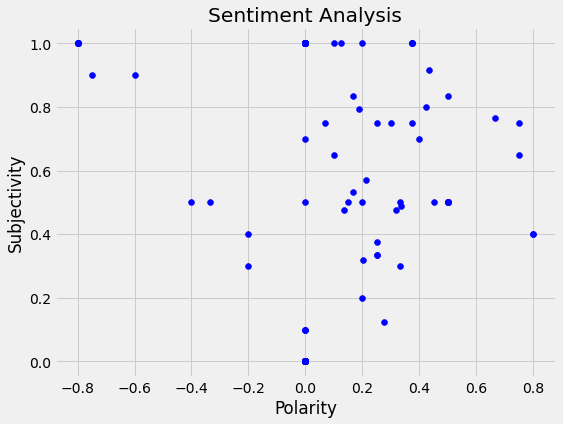

In [93]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [94]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

22.5

In [95]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

77.5

In [96]:
# Show the value counts
df['Analysis'].value_counts()

Negative    155
Positive     45
Name: Analysis, dtype: int64

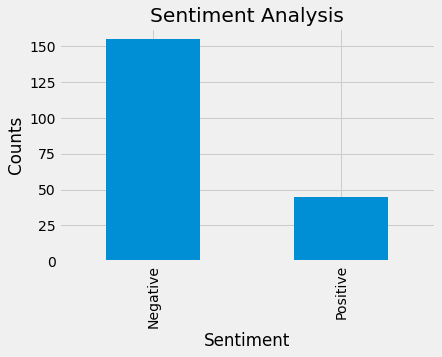

In [97]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [98]:
df.head()

,Tweets,Subjectivity,Polarity,Analysis
0,"VIVOIPL 2021 Anthem salutes the new, bold and ...",0.488636,0.336174,Positive
1,NEWS: BCCI announces Upstox as Official Partne...,0.500000,0.500000,Positive
2,"The new Indian spirit that innovates, redefine...",0.318182,0.202273,Positive
3,VIVOIPL salutes the new Indian spirit that is ...,0.477273,0.136364,Positive
4,NEWS: Finn Allen signs up with as replacement...,0.500000,0.500000,Positive


In [99]:
data = df

In [107]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = data[data['Analysis']== 'Positive']
df_minority = data[data['Analysis']== 'Negative']
 
# Downsample majority class and upsample the minority class
df_minority_upsampled = resample(df_minority, replace=True,n_samples=1000,random_state=123) 
df_majority_downsampled = resample(df_majority, replace=True,n_samples=1000,random_state=123) 
 
# Combine minority class with downsampled majority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority_downsampled])
 
# Display new class counts
df_upsampled['Analysis'].value_counts()

Positive    1000
Negative    1000
Name: Analysis, dtype: int64

In [108]:
# shuffle the DataFrame rows 
data= df_upsampled.sample(frac = 1)

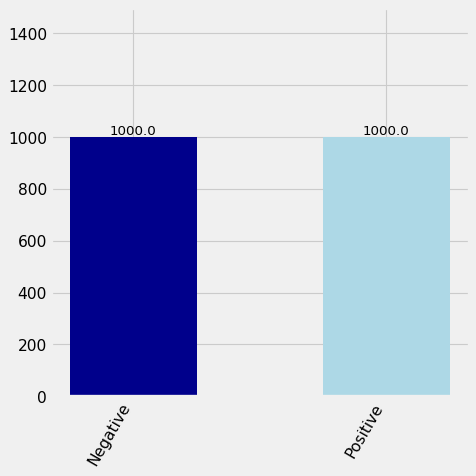

In [110]:
# Prepare Data
df = data.groupby('Analysis').size().reset_index(name='counts')
n = df['Analysis'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

# Plot Bars
plt.figure(figsize=(6,6), dpi= 80)
plt.bar(df['Analysis'], df['counts'], color=c, width=.5)
for i, val in enumerate(df['counts'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# Decoration
plt.gca().set_xticklabels(df['Analysis'], rotation=60, horizontalalignment= 'right')

plt.ylim(0, 1500)
plt.show()

In [111]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [112]:
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [114]:
data['Tweets'].head(5)

74     J Suchith moves to  for INR 30 Lac. \n\n_India...
184    Final. 16.2: WICKET! R Sharma (68) is out, c s...
115    Moeen Ali will now don the Yellow 💛 after  acq...
179    Final. 18.3: WICKET! H Pandya (3) is out, c Aj...
117     winning the bid race &amp; he will now don th...
Name: Tweets, dtype: object

In [115]:
print("printing some random reviews")
print(9, data['Tweets'].values[9])
print(34, data['Tweets'].values[34])
print(147, data['Tweets'].values[147])

printing some random reviews
9 After a three-team bidding war, K Gowtham joined  for INR 9.25 Cr. ⚡️⚡️

_India IPLAuction 
34 WOW! 👍👍

Kyle Jamieson will join  for a whopping amount of INR 15 Cr. _India IPLAuction
147 Final. 11.6: K Rabada to R Sharma, 4 runs, 102/2  MIvDC Dream11IPL IPL2020


In [116]:
# Combining all the above stundents 
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [117]:
preprocessed_text = preprocess_text(data['Tweets'].values)

100%|██████████| 2000/2000 [00:00<00:00, 15194.14it/s]


In [118]:
print("printing some random reviews")
print(9, preprocessed_text[9])
print(34, preprocessed_text[34])
print(147, preprocessed_text[147])

printing some random reviews
9 three team bidding war k gowtham joined inr 9 25 cr india iplauction
34 wow kyle jamieson join whopping amount inr 15 cr india iplauction
147 final 11 6 k rabada r sharma 4 runs 102 2 mivdc dream11ipl ipl2020


In [119]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(data["Analysis"])

In [120]:
y=np.array(y)

In [121]:
from sklearn.model_selection import train_test_split
#Breaking into Train and test
X_train, X_test, y_train, y_test = train_test_split(preprocessed_text, y, test_size=0.3,stratify=y ,random_state=42)


## Featuraization : Bag of Words

In [122]:
import pickle

In [125]:
from sklearn import preprocessing

count_vect = CountVectorizer()
count_trans = count_vect.fit(X_train) # fit has to happen only on train data

# Dump the file
pickle.dump(count_trans, open("/content/drive/MyDrive/Classroom/count_vect.pkl", "wb"))


# Testing phase
count = pickle.load(open("/content/drive/MyDrive/Classroom/count_vect.pkl", 'rb'))

# we use the fitted CountVectorizer to convert the text to vector
X_train_count =count.transform(X_train)
X_test_count = count.transform(X_test)

#Normalize Data
X_train_count = preprocessing.normalize(X_train_count)
print("Train Data Size: ",X_train_count.shape)

#Normalize Data
X_test_count = preprocessing.normalize(X_test_count)
print("Test Data Size: ",X_test_count.shape)



Train Data Size:  (1400, 604)
Test Data Size:  (600, 604)


## Random Forest with BOW

In [126]:
from sklearn.metrics import accuracy_score

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve

dept = [1, 5, 10, 50, 100, 500, 1000]
n_estimators =  [20, 40, 60, 80, 100, 120]

param_grid={'n_estimators':n_estimators , 'max_depth':dept}
clf = RandomForestClassifier()
model = GridSearchCV(clf,param_grid,scoring='accuracy',n_jobs=-1,cv=3)
model.fit(X_train_count,y_train)
print("optimal n_estimators",model.best_estimator_.n_estimators)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal n_estimators 20
optimal max_depth 100


In [128]:
optimal_max_depth = model.best_estimator_.max_depth
optimal_n_estimators = model.best_estimator_.n_estimators

Accuracy on Test data is 1.0
Accuracy on Train data is 1.0
---------------------------


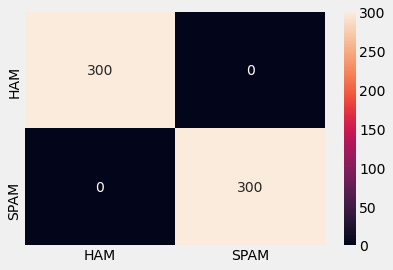

In [136]:
#training our model for max_depth=100,n_estimators = 120
clf = RandomForestClassifier(max_depth = optimal_max_depth,n_estimators = optimal_n_estimators)
clf.fit(X_train_count,y_train)

import pickle
filename = '/content/drive/MyDrive/Classroom/Api_bow.pkl'
pickle.dump(clf, open(filename, 'wb'))

pred_test =clf.predict(X_test_count)
test_accuracy = accuracy_score(y_test, pred_test)
pred_train = clf.predict(X_train_count)
train_accuracy =accuracy_score(y_train,pred_train)



print("Accuracy on Test data is " +str(test_accuracy))
print("Accuracy on Train data is "+str(train_accuracy))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['HAM','SPAM']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [137]:
le.classes_

array(['Negative', 'Positive'], dtype=object)

In [138]:
original =  ["Positive" if x==1 else "Negative" for x in y_test[:20]]
predicted = clf.predict(X_test_count[:20])
pred = []

for i in predicted:
  if i == 1:
    k = "Negative"
    pred.append(k)
  else:
    k = "Negative"
    pred.append(k)
# Creating a data frame
df = pd.DataFrame(list(zip(X_test[:20],original, pred,)), 
               columns =['Text','original_Classlabel', 'predicted_classlebel'])
df

,Text,original_Classlabel,predicted_classlebel
0,rovman powell goes unsold india iplauction,Negative,Negative
1,kedar devdhar unsold india iplauction,Negative,Negative
2,chetan sakariya base price inr 20 lac sold inr...,Negative,Negative
3,final 15 3 p dubey kishan 4 runs 135 2 mivdc d...,Positive,Negative
4,shahrukh khan base price 20 lac attracting int...,Negative,Negative
5,hat tricks ipl leading indian wicket taker ipl...,Positive,Negative
6,ben cutting moves inr 75 lac india iplauction,Negative,Negative
7,chennai super kings get fray glenn maxwell cur...,Positive,Negative
8,final 17 1 wicket k pollard 9 b kagiso rabada ...,Negative,Negative
9,vivoipl back india time circle favorite matche...,Positive,Negative


In [139]:
results=pd.DataFrame(columns=['Featuraization', 'Model' , 'Train-Accuracy', 'Test-Accuracy' ])
new = ['BOW','Random Forest',1.0,1.0]
results.loc[0] = new

## Logistic Regression with BOW

In [133]:
import warnings
warnings.filterwarnings("ignore")

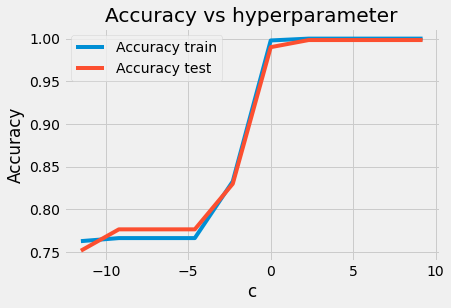

optimal c for which auc is maximum :  10000


In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import math

c = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_auc = []
test_auc = []

for i in c:
    log = LogisticRegression(penalty='l2',C=i)
    log.fit(X_train_count,y_train)
    prob_test = log.predict(X_test_count)
    test_auc.append(accuracy_score(y_test,prob_test))
    prob_train = log.predict(X_train_count)
    train_auc.append(accuracy_score(y_train,prob_train))
optimal_c= c[test_auc.index(max(test_auc))]
c = [math.log(x) for x in c]

#plot accuracy vs alpha
x = plt.subplot( )
x.plot(c, train_auc, label='Accuracy train')
x.plot(c, test_auc, label='Accuracy test')
plt.title('Accuracy vs hyperparameter')
plt.xlabel('c')
plt.ylabel('Accuracy')
x.legend()
plt.show()

print('optimal c for which auc is maximum : ',optimal_c)

Accuracy on Test data is 0.9983333333333333
Accuracy on Train data is 1.0
---------------------------


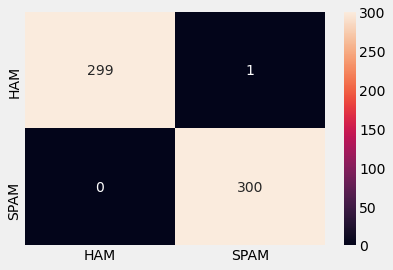

In [141]:
#Testing AUC on Test data
log = LogisticRegression(penalty='l2',C=optimal_c)
log.fit(X_train_count,y_train)

filename = '/content/drive/MyDrive/Classroom/Api_log_bow.pkl'
pickle.dump(log, open(filename, 'wb'))

pred_test =log.predict(X_test_count)
test_accuracy = accuracy_score(y_test, pred_test)
pred_train = log.predict(X_train_count)
train_accuracy =accuracy_score(y_train,pred_train) 




print("Accuracy on Test data is " +str(accuracy_score(y_test,pred_test)))
print("Accuracy on Train data is " +str(accuracy_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
from sklearn.metrics import confusion_matrix
class_names = ['HAM','SPAM']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [142]:
le.classes_

array(['Negative', 'Positive'], dtype=object)

In [143]:
original =  ["Positive" if x==1 else "Negative" for x in y_test[:20]]
predicted = log.predict(X_test_count[:20])
pred = []

for i in predicted:
  if i == 1:
    k = "Positive"
    pred.append(k)
  else:
    k = "Negative"
    pred.append(k)
# Creating a data frame
df = pd.DataFrame(list(zip(X_test[:20],original, pred,)), 
               columns =['Text','original_Classlabel', 'predicted_classlebel'])
df

,Text,original_Classlabel,predicted_classlebel
0,rovman powell goes unsold india iplauction,Negative,Negative
1,kedar devdhar unsold india iplauction,Negative,Negative
2,chetan sakariya base price inr 20 lac sold inr...,Negative,Negative
3,final 15 3 p dubey kishan 4 runs 135 2 mivdc d...,Positive,Positive
4,shahrukh khan base price 20 lac attracting int...,Negative,Negative
5,hat tricks ipl leading indian wicket taker ipl...,Positive,Positive
6,ben cutting moves inr 75 lac india iplauction,Negative,Negative
7,chennai super kings get fray glenn maxwell cur...,Positive,Positive
8,final 17 1 wicket k pollard 9 b kagiso rabada ...,Negative,Negative
9,vivoipl back india time circle favorite matche...,Positive,Positive


In [150]:
new = ['BOW','Logistic Regression',1.0,0.9983]
results.loc[1] = new

## Liner SVM with BOW

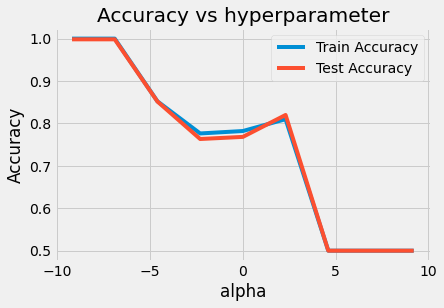

optimal alpha for which auc is maximum :  0.001


In [145]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
import math

alpha = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001]

train_auc = []
test_auc = []

for i in alpha:
    model = SGDClassifier(alpha=i, loss = "hinge") 
    model.fit(X_train_count,y_train)
    prob_cv = model.predict(X_test_count)
    test_auc.append(accuracy_score(y_test,prob_cv))
    prob_train = model.predict(X_train_count)
    train_auc.append(roc_auc_score(y_train,prob_train))
optimal_alpha= alpha[test_auc.index(max(test_auc))]
alpha=[math.log(x) for x in alpha]

#plot auc vs alpha
x = plt.subplot( )
x.plot(alpha, train_auc, label='Train Accuracy')
x.plot(alpha, test_auc, label='Test Accuracy')
plt.title('Accuracy vs hyperparameter')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
x.legend()
plt.show()

print('optimal alpha for which auc is maximum : ',optimal_alpha)

AUC on Test data is 0.9983333333333333
AUC on Train data is 1.0
---------------------------


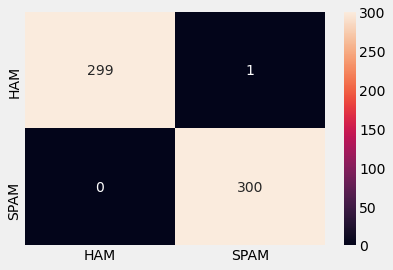

In [146]:
#Testing AUC on Test data
svm = SGDClassifier(alpha=optimal_alpha)

svm.fit(X_train_count,y_train)

filename = '/content/drive/MyDrive/Classroom/Api_svm_bow.pkl'
pickle.dump(svm, open(filename, 'wb'))

pred_test = svm.predict(X_test_count)
test_accuracy = accuracy_score(y_test, pred_test)
pred_train = svm.predict(X_train_count)
train_accuracy = accuracy_score(y_train,pred_train) 




print("AUC on Test data is " +str(test_accuracy))
print("AUC on Train data is " +str(train_accuracy))

print("---------------------------")

# Code for drawing seaborn heatmaps
from sklearn.metrics import confusion_matrix
class_names = ['HAM','SPAM']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [147]:
le.classes_

array(['Negative', 'Positive'], dtype=object)

In [148]:
original =  ["Positive" if x==1 else "Negative" for x in y_test[:20]]
predicted = svm.predict(X_test_count[:20])
pred = []

for i in predicted:
  if i == 1:
    k = "Positive"
    pred.append(k)
  else:
    k = "Negative"
    pred.append(k)
# Creating a data frame
df = pd.DataFrame(list(zip(X_test[:20],original, pred,)), 
               columns =['Text','original_Classlabel', 'predicted_classlebel'])
df

,Text,original_Classlabel,predicted_classlebel
0,rovman powell goes unsold india iplauction,Negative,Negative
1,kedar devdhar unsold india iplauction,Negative,Negative
2,chetan sakariya base price inr 20 lac sold inr...,Negative,Negative
3,final 15 3 p dubey kishan 4 runs 135 2 mivdc d...,Positive,Positive
4,shahrukh khan base price 20 lac attracting int...,Negative,Negative
5,hat tricks ipl leading indian wicket taker ipl...,Positive,Positive
6,ben cutting moves inr 75 lac india iplauction,Negative,Negative
7,chennai super kings get fray glenn maxwell cur...,Positive,Positive
8,final 17 1 wicket k pollard 9 b kagiso rabada ...,Negative,Negative
9,vivoipl back india time circle favorite matche...,Positive,Positive


In [149]:
new = ['BOW','SVM',1.0,0.9983]
results.loc[2] = new

## Performance Table

In [151]:
results

,Featuraization,Model,Train-Accuracy,Test-Accuracy
0,BOW,Random Forest,1.0,1.0000
1,BOW,Logistic Regression,1.0,0.9983
2,BOW,SVM,1.0,0.9983
